In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
# 定义环境：0=空地，1=金币（+10），2=陷阱（-5），3=智能体起点
world = np.array([
    [0, 0, 2, 0, 0],
    [0, 2, 0, 0, 0],
    [0, 0, 0, 2, 0],
    [0, 0, 0, 0, 1],
    [3, 0, 0, 0, 0]
])

# 动作：上、下、左、右（用箭头方向表示）
actions = [(-1,0), (1,0), (0,-1), (0,1)]  # 对应↑、↓、←、→

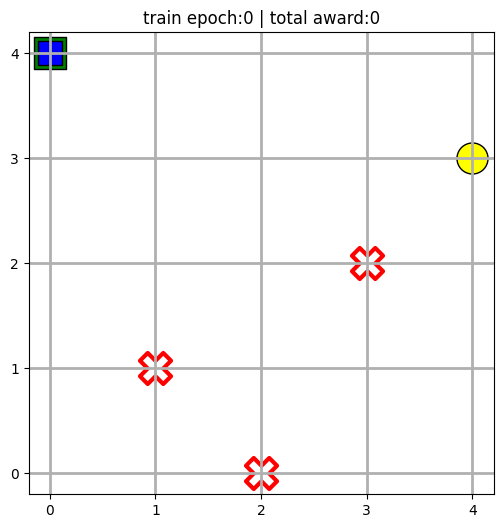

In [3]:
def draw_world(pos, episode, total_reward, path=[]):
    plt.figure(figsize=(6,6))
    # 画格子背景
    for i in range(5):
        for j in range(5):
            if world[i,j] == 1:  # 金币
                plt.scatter(j, i, c='yellow', s=500, marker='o', edgecolors='black')
            elif world[i,j] == 2:  # 陷阱
                plt.scatter(j, i, c='white', s=500, marker='X', edgecolors='red', linewidths=3)
            elif world[i,j] == 3:  # 起点
                plt.scatter(j, i, c='green', s=500, marker='s', edgecolors='black')
    # 画智能体当前位置
    plt.scatter(pos[1], pos[0], c='blue', s=300, marker='s', edgecolors='black')
    # 画历史路径（浅灰色轨迹）
    if path:
        path_x = [p[1] for p in path]
        path_y = [p[0] for p in path]
        plt.plot(path_x, path_y, 'gray', linewidth=2, alpha=0.5)
    # 显示训练信息
    plt.title(f"train epoch:{episode} | total award:{total_reward}", fontsize=12)
    plt.xticks(range(5))
    plt.yticks(range(5))
    plt.grid(True, linewidth=2)
    plt.show()

# 显示初始状态（智能体在起点）
start_pos = tuple(np.argwhere(world == 3)[0])  # (4,0)
draw_world(start_pos, episode=0, total_reward=0)

In [4]:
# Q表：25个格子 × 4个动作，初始全为0（AI一开始啥都不懂）
q_table = np.zeros((25, 4))  # 25=5×5格子，4=四个方向动作

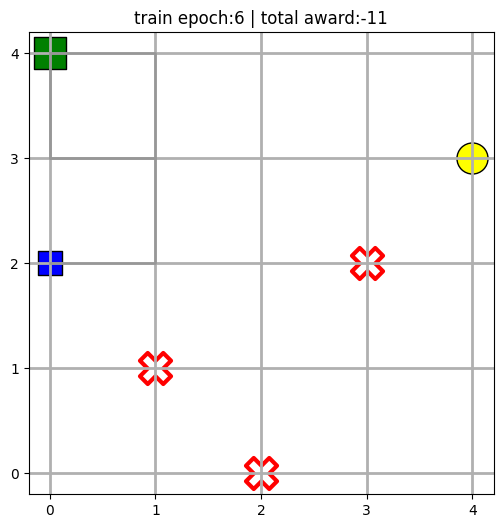

In [ ]:
episodes = 50
learning_rate = 0.1
discount_rate = 0.9
epsilon = 0.2

def pos_to_idx(pos):
  return pos[0] * 5 + pos[1]

for episode in range(episodes):
  current_pos = start_pos
  total_reward = 0
  path = [current_pos]
  done = False

  while not done:
    if np.random.random() < epsilon:
      action = np.random.choice(4)
    else:
      state_idx = pos_to_idx(current_pos)
      action = np.argmax(q_table[state_idx])

    dx, dy = actions[action]
    new_pos = (current_pos[0] + dx, current_pos[1] + dy)

    if new_pos[0] < 0 or new_pos[0] >=5 or new_pos[1]<0 or new_pos[1]>=5:
      new_pos = current_pos
      reward = -3
    else:
      if world[new_pos] == 1:
        reward =10
        done = True
      elif world[new_pos] == 2:
        reward = -5
      else:
        reward = -1

    current_idx = pos_to_idx(current_pos)
    new_idx = pos_to_idx(new_pos)
    q_table[current_idx, action] += learning_rate * (
        reward + discount_rate * np.max(q_table[new_idx]) - q_table[current_idx, action]
    )

    current_pos = new_pos
    total_reward += reward
    path.append(current_pos)

    clear_output(wait=True)
    draw_world(current_pos, episode+1, total_reward, path)
    time.sleep(0.3)

time.sleep(1)